# A Comparative Analysis of Machine Learning Algorithms In Predicting Chances of Getting A Heart Disease

## Objective
- is it true that high blood pressure raises the risk of having a heart attack?
- is there a correlation between different types of chest pain and the possibility of having a heart attack?
- is the cholesterol level eventually a risk factor for a heart attack in a certain gender?


### Data Uploading

In [1]:
## Importing packages

library(datasets)
library(tidyverse) 
library(caret)
library(grid)
library(gridExtra)
library(GGally)
library(rpart)
library(rpart.plot)
library(corrplot)
library(mlbench)
library(ggplot2)
library(dplyr)
library(randomForest)  
library(caTools) 
library(party) 
library(magrittr)
library(tidyverse)
library(e1071)
library(ggcorrplot)
library(kernlab)
library(mice)
library(pscl)
library(car)
library(plyr)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning mess

In [2]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

In [3]:
heart <- read.csv("heart.csv", header=T)
table(heart$output)


  0   1 
138 165 

### Data Cleaning

In [4]:
glimpse(heart)

Rows: 303
Columns: 14
$ age                   <int> 53, 52, 63, 57, 52, 41, 57, 66, 56, 57, 65, 64, ~
$ sex                   <int> 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ Chest_Pain            <int> 2, 0, 3, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, ~
$ Rest_blood_pressure   <int> 128, 128, 145, 140, 118, 135, 110, 160, 130, 150~
$ chol                  <int> 216, 204, 233, 192, 186, 203, 201, 228, 256, 276~
$ Fast_blood_sugar      <int> 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ~
$ Resting_result        <int> 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, ~
$ Max_heart_rate        <int> 115, 156, 150, 148, 190, 132, 126, 138, 142, 112~
$ Exercise_induce_Agina <int> 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, ~
$ oldpeak               <dbl> 0.0, 1.0, 2.3, 0.4, 0.0, 0.0, 1.5, 2.3, 0.6, 0.6~
$ Slope                 <int> 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, ~
$ Number_.of_vessel     <int> 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 3, 0, 1, ~
$ thall_Rate      

In [5]:
heart[heart == "?"] <- NA

In [6]:
heart$output <- as.factor(heart$output)
heart$Chest_Pain <- as.factor(heart$Chest_Pain)
heart$sex <- as.factor(heart$sex)
heart$Fast_blood_sugar <- as.factor(heart$Fast_blood_sugar)
heart$Resting_result <- as.factor(heart$Resting_result)
heart$Exercise_induce_Agina <- as.factor(heart$Exercise_induce_Agina)
heart$Slope <- as.factor(heart$Slope)
heart$Number_.of_vessel <- as.factor(heart$Number_.of_vessel)
heart$thall_Rate <- as.factor(heart$thall_Rate)
str(heart)

'data.frame':	303 obs. of  14 variables:
 $ age                  : int  53 52 63 57 52 41 57 66 56 57 ...
 $ sex                  : Factor w/ 2 levels "0","1": 1 2 2 2 2 2 2 2 2 2 ...
 $ Chest_Pain           : Factor w/ 4 levels "0","1","2","3": 3 1 4 1 4 2 1 1 3 1 ...
 $ Rest_blood_pressure  : int  128 128 145 140 118 135 110 160 130 150 ...
 $ chol                 : int  216 204 233 192 186 203 201 228 256 276 ...
 $ Fast_blood_sugar     : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 1 2 1 ...
 $ Resting_result       : Factor w/ 3 levels "0","1","2": 1 2 1 2 1 2 2 1 1 1 ...
 $ Max_heart_rate       : int  115 156 150 148 190 132 126 138 142 112 ...
 $ Exercise_induce_Agina: Factor w/ 2 levels "0","1": 1 2 1 1 1 1 2 1 2 2 ...
 $ oldpeak              : num  0 1 2.3 0.4 0 0 1.5 2.3 0.6 0.6 ...
 $ Slope                : Factor w/ 3 levels "0","1","2": 3 2 1 2 2 2 2 3 2 2 ...
 $ Number_.of_vessel    : Factor w/ 5 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 2 2 ...
 $ thall_Rate           : Fac

In [7]:
levels(heart$sex) <- c("Female", "Male")
levels(heart$thall_Rate) <- c("normal", "fixed_defect","reversible_defect")
levels(heart$Chest_Pain) <- c("Typical_Angina", "Atypical_Angina","Non-Anginal_Pain","Asymptomatic")
levels(heart$output) <- c("No_Disease", "Disease")

infection <- heart$output
table(infection)

infection
No_Disease    Disease 
       138        165 

### Data Analysis

In [8]:
gender <- heart$sex

table(gender)

gender
Female   Male 
    96    207 

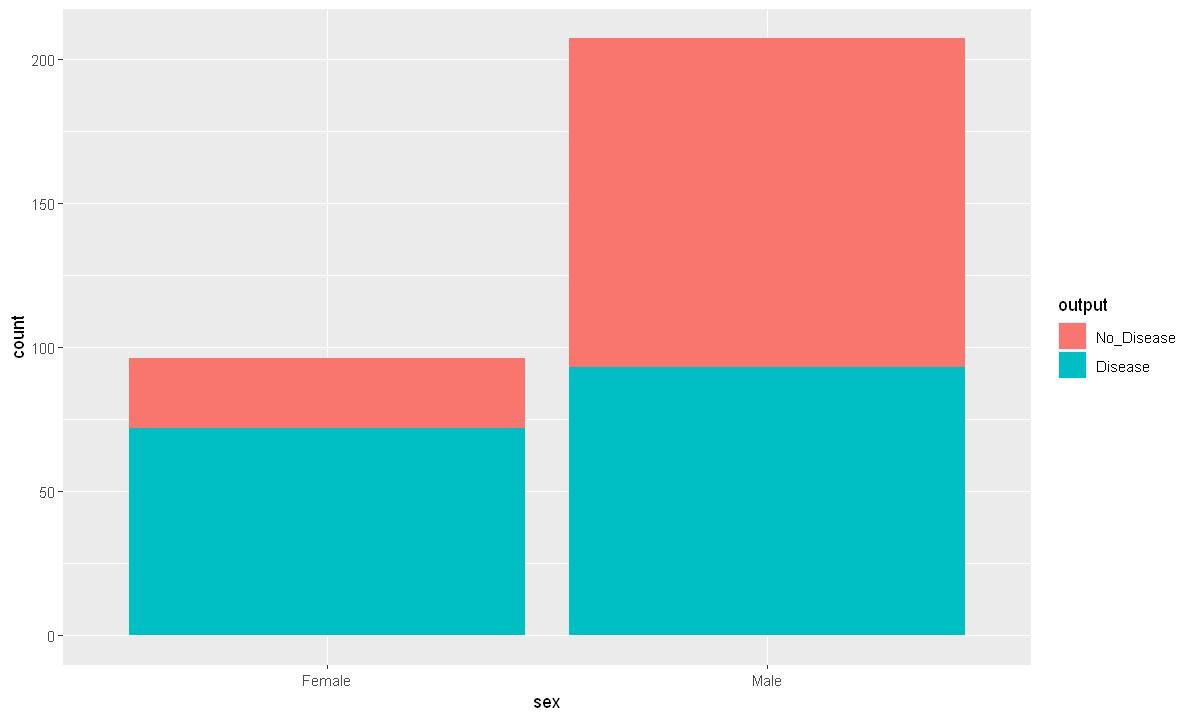

In [51]:
ggplot(heart) +
  aes(x = sex, fill = output) + # fill by years
  geom_bar()

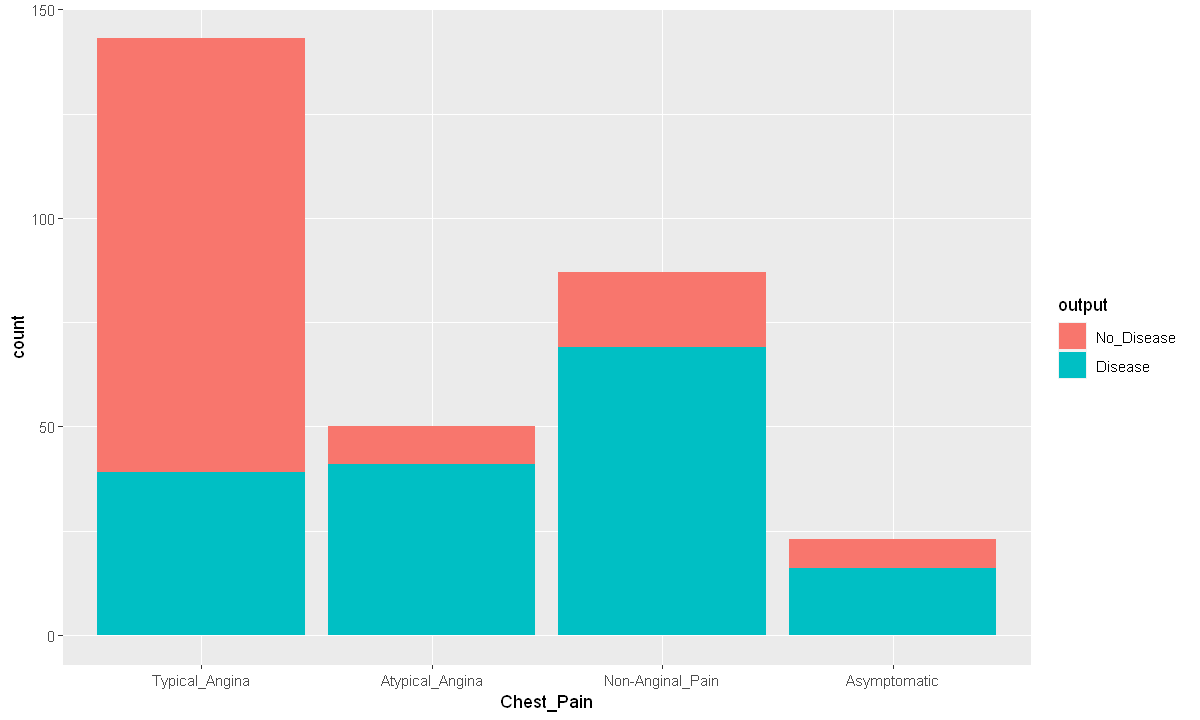

In [52]:
ggplot(heart) +
  aes(x = Chest_Pain, fill = output) + # fill by years
  geom_bar()

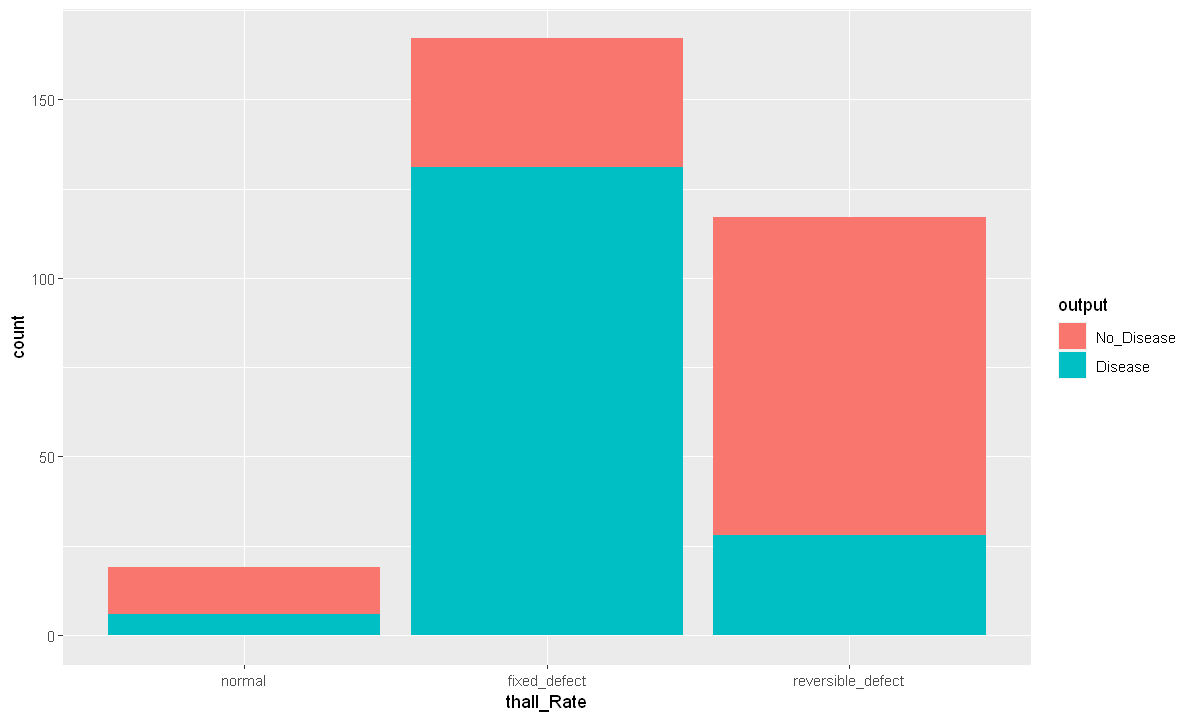

In [53]:
ggplot(heart) +
  aes(x = thall_Rate, fill = output) + # fill by years
  geom_bar()

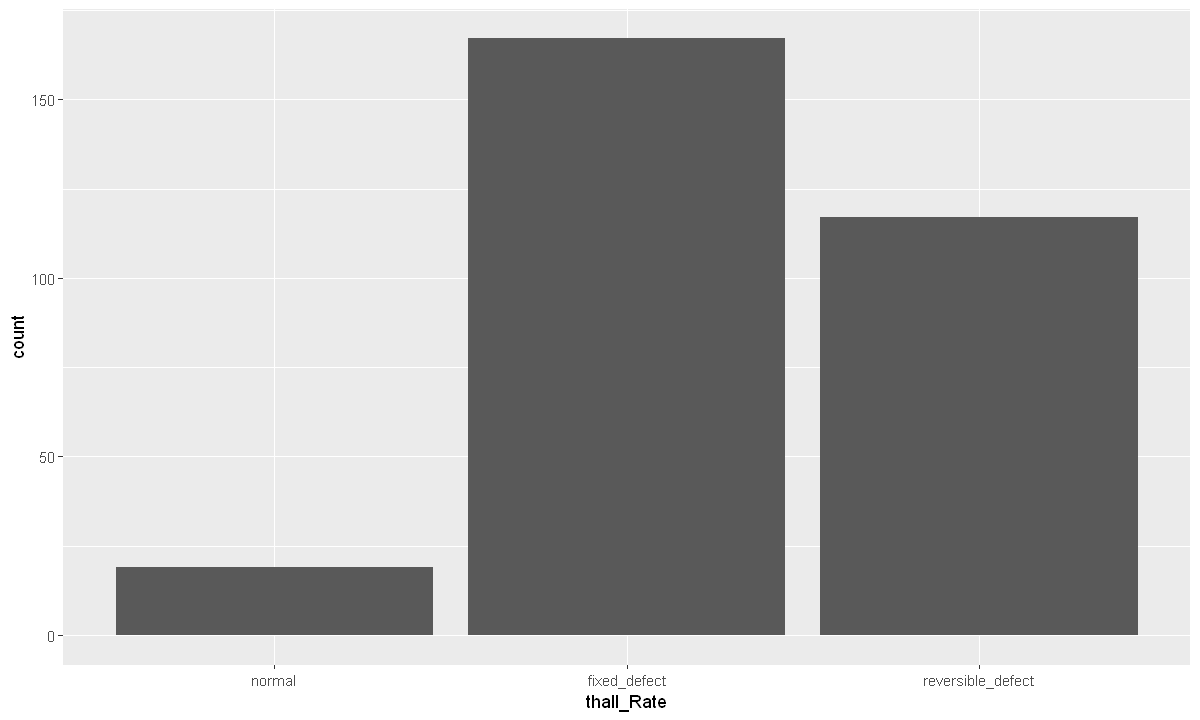

In [56]:
ggplot(heart) +
  aes(x = thall_Rate, fill = chol ) + # fill by years
  geom_bar()

In [9]:
head(heart)
summary(heart)

age,sex,Chest_Pain,Rest_blood_pressure,chol,Fast_blood_sugar,Resting_result,Max_heart_rate,Exercise_induce_Agina,oldpeak,Slope,Number_.of_vessel,thall_Rate,output
53,Female,Non-Anginal_Pain,128,216,0,0,115,0,0.0,2,0,fixed_defect,Disease
52,Male,Typical_Angina,128,204,1,1,156,1,1.0,1,0,normal,No_Disease
63,Male,Asymptomatic,145,233,1,0,150,0,2.3,0,0,normal,Disease
57,Male,Typical_Angina,140,192,0,1,148,0,0.4,1,0,normal,Disease
52,Male,Asymptomatic,118,186,0,0,190,0,0.0,1,0,normal,Disease
41,Male,Atypical_Angina,135,203,0,1,132,0,0.0,1,0,normal,Disease


      age            sex                 Chest_Pain  Rest_blood_pressure
 Min.   :29.00   Female: 96   Typical_Angina  :143   Min.   : 94.0      
 1st Qu.:47.50   Male  :207   Atypical_Angina : 50   1st Qu.:120.0      
 Median :55.00                Non-Anginal_Pain: 87   Median :130.0      
 Mean   :54.37                Asymptomatic    : 23   Mean   :131.6      
 3rd Qu.:61.00                                       3rd Qu.:140.0      
 Max.   :77.00                                       Max.   :200.0      
      chol       Fast_blood_sugar Resting_result Max_heart_rate 
 Min.   :126.0   0:258            0:147          Min.   : 71.0  
 1st Qu.:211.0   1: 45            1:152          1st Qu.:133.5  
 Median :240.0                    2:  4          Median :153.0  
 Mean   :246.3                                   Mean   :149.6  
 3rd Qu.:274.5                                   3rd Qu.:166.0  
 Max.   :564.0                                   Max.   :202.0  
 Exercise_induce_Agina    oldpeak 

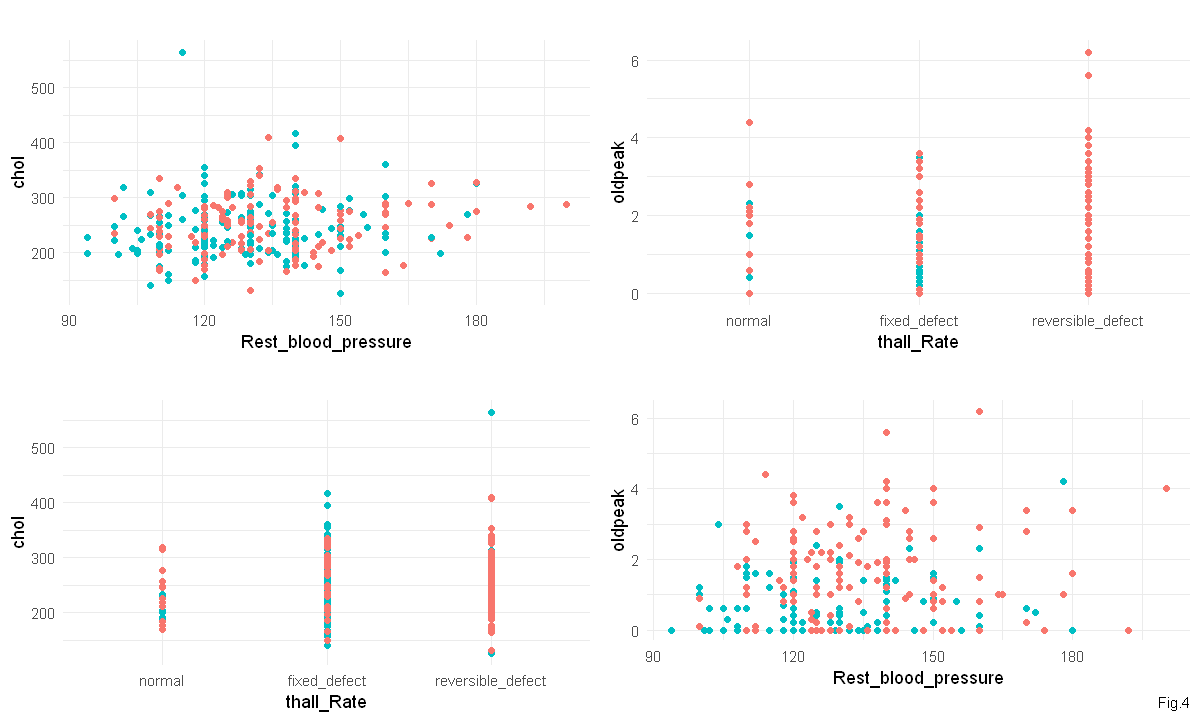

In [10]:
fig(10, 6)
f1 <- heart %>%
    group_by(output, Rest_blood_pressure, chol) %>%
    ggplot(aes(Rest_blood_pressure, chol, color = output)) + 
        geom_point() +  
        theme_minimal() +
        theme(legend.position = "none") +
        labs(title = "")

f2 <- heart %>%
    group_by(output, thall_Rate, oldpeak) %>%
    ggplot(aes(thall_Rate, oldpeak, color = output)) + 
        geom_point() +  
        theme_minimal() +
        theme(legend.position = "none") +
        labs(title = "")

f3 <- heart %>%
    group_by(output, thall_Rate, chol) %>%
    ggplot(aes(thall_Rate, chol, color = output)) + 
        geom_point() +  
        theme_minimal() +
        theme(legend.position = "none") +
        labs(title = "")

f4 <- heart %>%
    group_by(output, Rest_blood_pressure, oldpeak) %>%
    ggplot(aes(Rest_blood_pressure, oldpeak, color = output)) + 
        geom_point() +  
        theme_minimal() +
        theme(legend.position = "none") +
        labs(title = "", caption = "Fig.4")

grid.arrange(f1, f2, f3, f4, ncol = 2)

In [11]:
xtabs(~ output + sex, data=heart)

            sex
output       Female Male
  No_Disease     24  114
  Disease        72   93

In [12]:
#####################################
xtabs(~ output + sex, data=heart)
xtabs(~ output + Chest_Pain, data=heart)
xtabs(~ output + Fast_blood_sugar, data=heart)
xtabs(~ output + Resting_result, data=heart)
xtabs(~ output + Exercise_induce_Agina, data=heart)
xtabs(~ output + Slope, data=heart)
xtabs(~ output + Number_.of_vessel, data=heart)
xtabs(~ output + thall_Rate, data=heart)

            sex
output       Female Male
  No_Disease     24  114
  Disease        72   93

            Chest_Pain
output       Typical_Angina Atypical_Angina Non-Anginal_Pain Asymptomatic
  No_Disease            104               9               18            7
  Disease                39              41               69           16

            Fast_blood_sugar
output         0   1
  No_Disease 116  22
  Disease    142  23

            Resting_result
output        0  1  2
  No_Disease 79 56  3
  Disease    68 96  1

            Exercise_induce_Agina
output         0   1
  No_Disease  62  76
  Disease    142  23

            Slope
output         0   1   2
  No_Disease  12  91  35
  Disease      9  49 107

            Number_.of_vessel
output         0   1   2   3   4
  No_Disease  45  44  31  17   1
  Disease    130  21   7   3   4

            thall_Rate
output       normal fixed_defect reversible_defect
  No_Disease     13           36                89
  Disease         6          131                28

### Data Model
### Decision Tree

In [13]:
set.seed(300)

# runif function returns a uniform distribution which can be further conditionally split into 75-25 ratio
heart[, 'train'] <- ifelse(runif(nrow(heart)) < 0.75, 1, 0)

trainSet <- heart[heart$train == 1,]
testSet <- heart[heart$train == 0, ]

trainColNum <- grep('train', names(trainSet))

trainSet <- trainSet[, -trainColNum]
testSet <- testSet[, -trainColNum]

# CART Modeling via rpart
treeFit <- rpart(output~.,data=trainSet,method = 'class')
print(treeFit)


n= 214 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 214 96 Disease (0.44859813 0.55140187)  
   2) thall_Rate=normal,reversible_defect 92 22 No_Disease (0.76086957 0.23913043)  
     4) oldpeak>=0.7 63  6 No_Disease (0.90476190 0.09523810) *
     5) oldpeak< 0.7 29 13 Disease (0.44827586 0.55172414)  
      10) chol>=230 17  6 No_Disease (0.64705882 0.35294118) *
      11) chol< 230 12  2 Disease (0.16666667 0.83333333) *
   3) thall_Rate=fixed_defect 122 26 Disease (0.21311475 0.78688525)  
     6) Number_.of_vessel=1,2,3 38 18 Disease (0.47368421 0.52631579)  
      12) Chest_Pain=Typical_Angina 14  1 No_Disease (0.92857143 0.07142857) *
      13) Chest_Pain=Atypical_Angina,Non-Anginal_Pain,Asymptomatic 24  5 Disease (0.20833333 0.79166667) *
     7) Number_.of_vessel=0,4 84  8 Disease (0.09523810 0.90476190) *


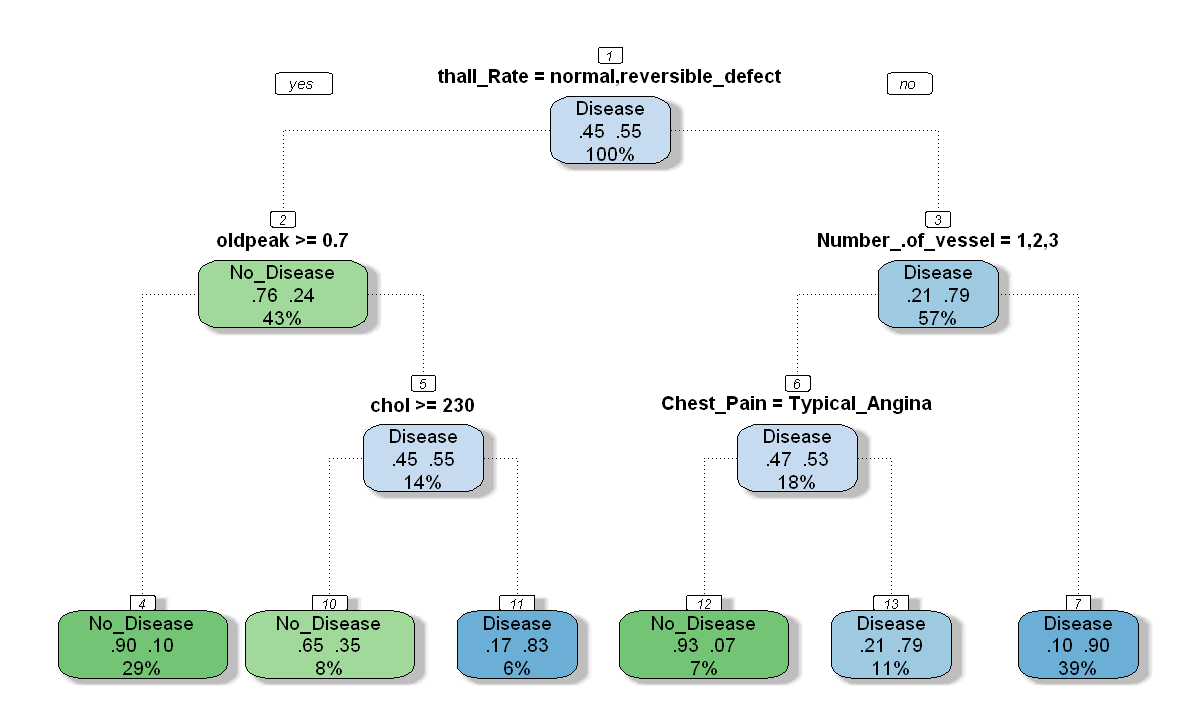

In [14]:
rattle::fancyRpartPlot(treeFit, type = 1, sub = "")

In [15]:
# run predicion on test dataset
Prediction1 <- predict(treeFit,newdata=testSet,type = 'class')


## Print the confusion matrix to check the accuracy
confusionMatrix(Prediction1,testSet$output)

Confusion Matrix and Statistics

            Reference
Prediction   No_Disease Disease
  No_Disease         33      10
  Disease             9      37
                                          
               Accuracy : 0.7865          
                 95% CI : (0.6869, 0.8663)
    No Information Rate : 0.5281          
    P-Value [Acc > NIR] : 3.952e-07       
                                          
                  Kappa : 0.5722          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.7857          
            Specificity : 0.7872          
         Pos Pred Value : 0.7674          
         Neg Pred Value : 0.8043          
             Prevalence : 0.4719          
         Detection Rate : 0.3708          
   Detection Prevalence : 0.4831          
      Balanced Accuracy : 0.7865          
                                          
       'Positive' Class : No_Dis

### RANDOM FOREST

In [16]:
# Train/validation split
set.seed(3) # for reproducibility
idx <- createDataPartition(factor(heart$output), 
                           times = 1, # one time
                           p = 0.5, # 50% proportion
                           list = FALSE)

## train set
trainset <- heart[idx,] 
## validation set
validation_set <- heart[-idx,] %>% select(-output)   
validation_labels <- heart[-idx,] %>% select(output)
validation_set

,age,sex,Chest_Pain,Rest_blood_pressure,chol,Fast_blood_sugar,Resting_result,Max_heart_rate,Exercise_induce_Agina,oldpeak,Slope,Number_.of_vessel,thall_Rate,train
1,53,Female,Non-Anginal_Pain,128,216,0,0,115,0,0.0,2,0,fixed_defect,0
2,52,Male,Typical_Angina,128,204,1,1,156,1,1.0,1,0,normal,0
6,41,Male,Atypical_Angina,135,203,0,1,132,0,0.0,1,0,normal,1
13,56,Male,Typical_Angina,132,184,0,0,105,1,2.1,1,1,normal,0
18,58,Female,Typical_Angina,170,225,1,0,146,1,2.8,1,2,normal,1
20,59,Male,Typical_Angina,164,176,1,0,90,0,1.0,1,2,normal,1
24,57,Female,Typical_Angina,120,354,0,1,163,1,0.6,2,0,fixed_defect,1
30,64,Male,Asymptomatic,110,211,0,0,144,1,1.8,1,0,fixed_defect,1
31,58,Female,Asymptomatic,150,283,1,0,162,0,1.0,2,0,fixed_defect,1
33,58,Female,Non-Anginal_Pain,120,340,0,1,172,0,0.0,2,0,fixed_defect,0


In [17]:
# Now, we are going to use the caret package to train our model.
control <- trainControl(method = "cv", # cross-validation
                        number = 10,
                        verboseIter = TRUE,
                        savePredictions = "final",
                        classProbs = TRUE) 

In [18]:
set.seed(1)
model <- train(output ~ ., data = trainSet,
               trControl = control,
               maximize = TRUE,
               tuneGrid = data.frame(mtry = 4),
               method = "rf")

+ Fold01: mtry=4 
- Fold01: mtry=4 
+ Fold02: mtry=4 
- Fold02: mtry=4 
+ Fold03: mtry=4 
- Fold03: mtry=4 
+ Fold04: mtry=4 
- Fold04: mtry=4 
+ Fold05: mtry=4 
- Fold05: mtry=4 
+ Fold06: mtry=4 
- Fold06: mtry=4 
+ Fold07: mtry=4 
- Fold07: mtry=4 
+ Fold08: mtry=4 
- Fold08: mtry=4 
+ Fold09: mtry=4 
- Fold09: mtry=4 
+ Fold10: mtry=4 
- Fold10: mtry=4 
Aggregating results
Fitting final model on full training set


In [19]:
model

Random Forest 

214 samples
 13 predictor
  2 classes: 'No_Disease', 'Disease' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 194, 192, 193, 192, 192, 193, ... 
Resampling results:

  Accuracy   Kappa   
  0.7936147  0.580728

Tuning parameter 'mtry' was held constant at a value of 4

In [20]:
confusionMatrix.train(model)

Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
            Reference
Prediction   No_Disease Disease
  No_Disease       33.6     9.3
  Disease          11.2    45.8
                            
 Accuracy (average) : 0.7944


In [21]:
val_preds <- predict(model, validation_set)

In [22]:
confusionMatrix(val_preds, validation_labels$output)

Confusion Matrix and Statistics

            Reference
Prediction   No_Disease Disease
  No_Disease         65       5
  Disease             4      77
                                          
               Accuracy : 0.9404          
                 95% CI : (0.8899, 0.9724)
    No Information Rate : 0.543           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.88            
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9420          
            Specificity : 0.9390          
         Pos Pred Value : 0.9286          
         Neg Pred Value : 0.9506          
             Prevalence : 0.4570          
         Detection Rate : 0.4305          
   Detection Prevalence : 0.4636          
      Balanced Accuracy : 0.9405          
                                          
       'Positive' Class : No_Dis

In [23]:
varImp(model)

rf variable importance

  only 20 most important variables shown (out of 21)

                            Overall
oldpeak                     100.000
Max_heart_rate               92.774
thall_Ratefixed_defect       83.545
thall_Ratereversible_defect  67.096
chol                         64.108
age                          61.499
Rest_blood_pressure          49.851
Exercise_induce_Agina1       41.253
Number_.of_vessel1           27.307
Chest_PainNon-Anginal_Pain   27.136
sexMale                      22.126
Slope2                       20.865
Chest_PainAsymptomatic       18.023
Number_.of_vessel2           17.908
Slope1                       16.065
Resting_result1              15.861
Chest_PainAtypical_Angina     7.979
Fast_blood_sugar1             7.822
Number_.of_vessel3            6.433
Number_.of_vessel4            1.341

In [24]:
# Another library for random forest

# Set random seed to make results reproducible:
set.seed(17)
# Calculate the size of each of the data sets:
data_set_size <- floor(nrow(heart)/2)
# Generate a random sample of "data_set_size" indexes
indexes <- sample(1:nrow(heart), size = data_set_size)

# Assign the data to the correct sets
training <- heart[indexes,]
validation1 <- heart[-indexes,]

#import the package
library(randomForest)
# Perform training:
rf_classifier = randomForest(output ~ ., data=training, ntree=100, mtry=2, importance=TRUE)
rf_classifier


Call:
 randomForest(formula = output ~ ., data = training, ntree = 100,      mtry = 2, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 20.53%
Confusion matrix:
           No_Disease Disease class.error
No_Disease         47      17   0.2656250
Disease            14      73   0.1609195

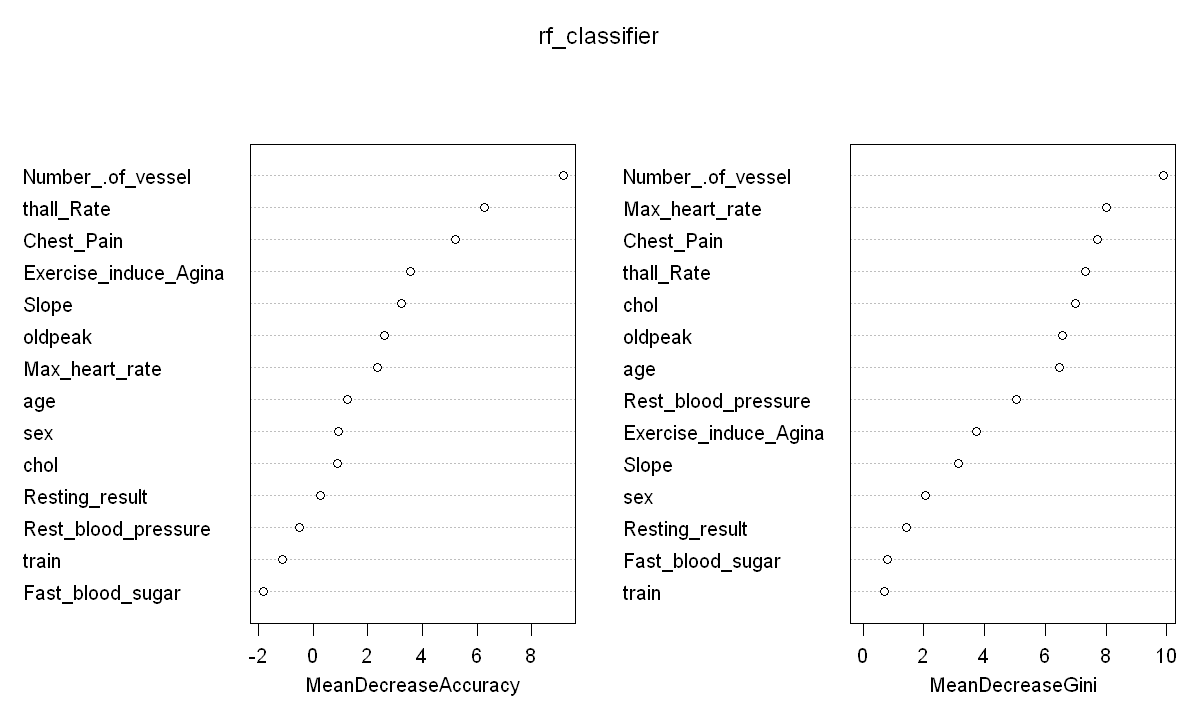

In [25]:
varImpPlot(rf_classifier)

In [26]:
set.seed(222)
rf <- randomForest(output~., data=trainSet,
                   ntree = 300,
                   mtry = 8,
                   importance = TRUE,
                   proximity = TRUE)
print(rf)
attributes(rf)


Call:
 randomForest(formula = output ~ ., data = trainSet, ntree = 300,      mtry = 8, importance = TRUE, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 8

        OOB estimate of  error rate: 16.36%
Confusion matrix:
           No_Disease Disease class.error
No_Disease         75      21   0.2187500
Disease            14     104   0.1186441


$names
 [1] "call"            "type"            "predicted"       "err.rate"       
 [5] "confusion"       "votes"           "oob.times"       "classes"        
 [9] "importance"      "importanceSD"    "localImportance" "proximity"      
[13] "ntree"           "mtry"            "forest"          "y"              
[17] "test"            "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

In [27]:
p1 <- predict(rf, trainSet)
confusionMatrix(p1, trainSet$output)

Confusion Matrix and Statistics

            Reference
Prediction   No_Disease Disease
  No_Disease         96       0
  Disease             0     118
                                     
               Accuracy : 1          
                 95% CI : (0.9829, 1)
    No Information Rate : 0.5514     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.4486     
         Detection Rate : 0.4486     
   Detection Prevalence : 0.4486     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : No_Disease 
                                     

In [28]:
p2 <- predict(rf, testSet)
confusionMatrix(p2, testSet$output)

Confusion Matrix and Statistics

            Reference
Prediction   No_Disease Disease
  No_Disease         32       9
  Disease            10      38
                                          
               Accuracy : 0.7865          
                 95% CI : (0.6869, 0.8663)
    No Information Rate : 0.5281          
    P-Value [Acc > NIR] : 3.952e-07       
                                          
                  Kappa : 0.5711          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.7619          
            Specificity : 0.8085          
         Pos Pred Value : 0.7805          
         Neg Pred Value : 0.7917          
             Prevalence : 0.4719          
         Detection Rate : 0.3596          
   Detection Prevalence : 0.4607          
      Balanced Accuracy : 0.7852          
                                          
       'Positive' Class : No_Dis

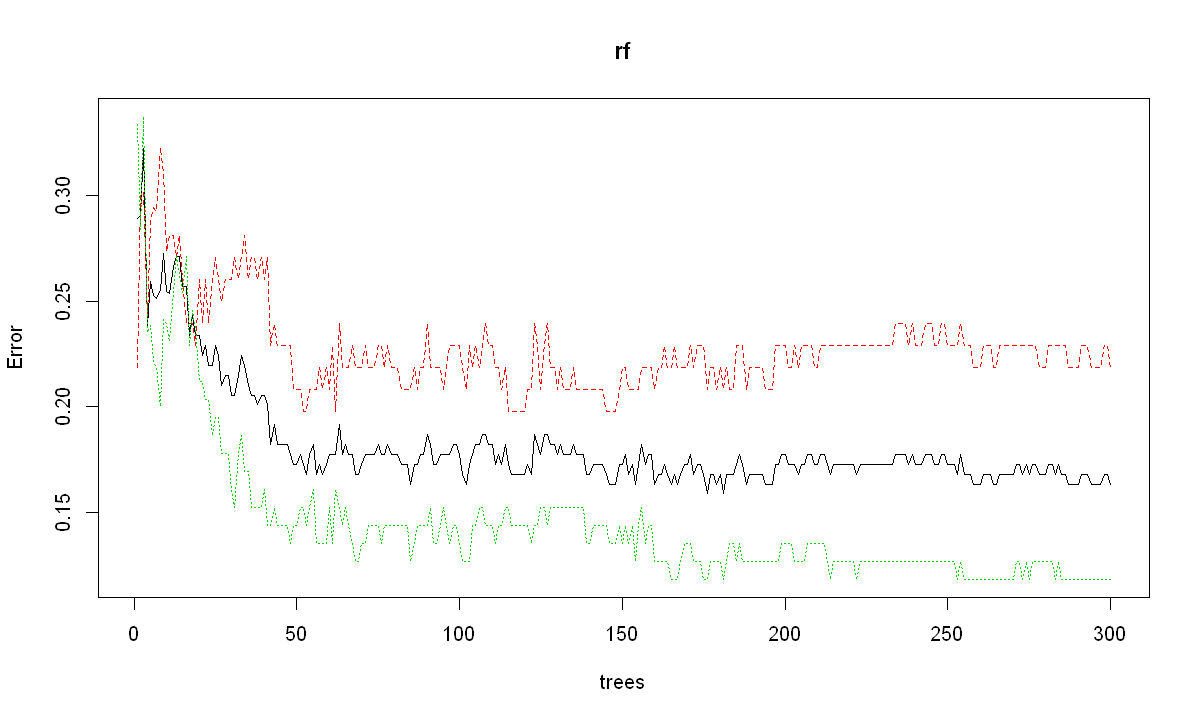

In [29]:
plot(rf)

mtry = 3  OOB error = 18.69% 
Searching left ...
mtry = 6 	OOB error = 17.76% 
0.05 0.05 
mtry = 12 	OOB error = 17.76% 
0 0.05 
Searching right ...
mtry = 1 	OOB error = 16.36% 
0.07894737 0.05 


Warning message in randomForest.default(x, y, mtry = mtryCur, ntree = ntreeTry, :
"invalid mtry: reset to within valid range"

mtry = 0 	OOB error = 17.76% 
-0.08571429 0.05 


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"

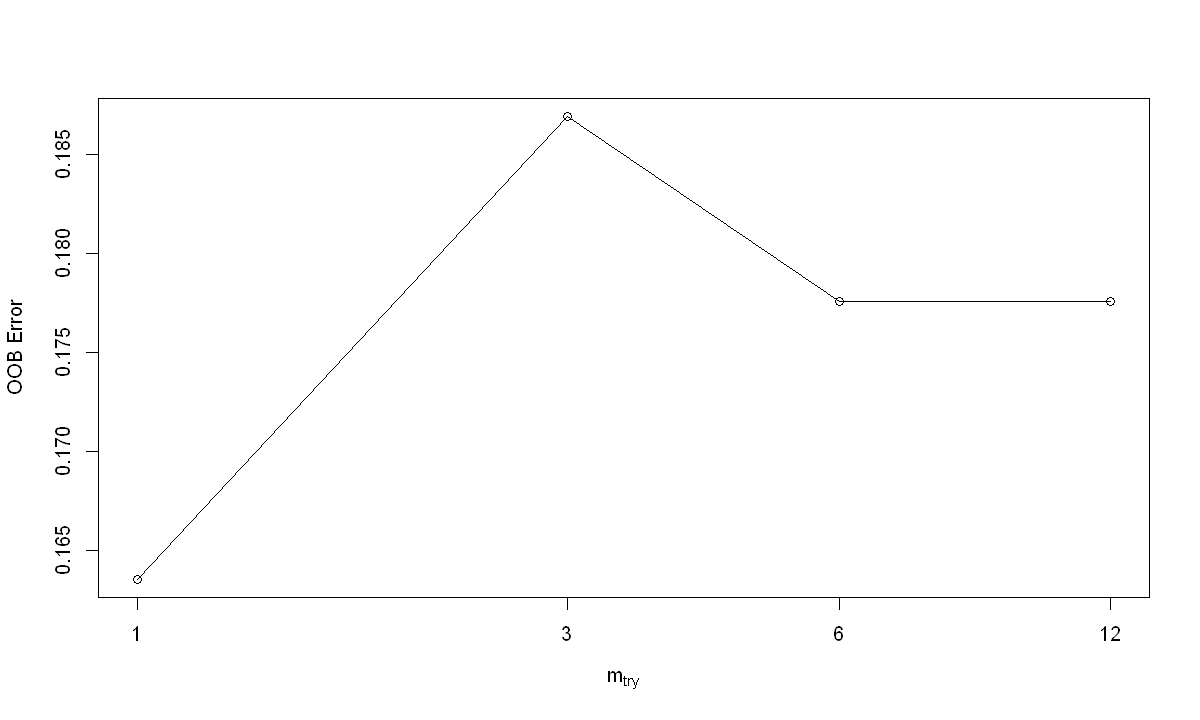

In [30]:
t <- tuneRF(trainSet[,-14], trainSet[,14],
       stepFactor = 0.5,
       plot = TRUE,
       ntreeTry = 150,
       trace = TRUE,
       improve = 0.05)

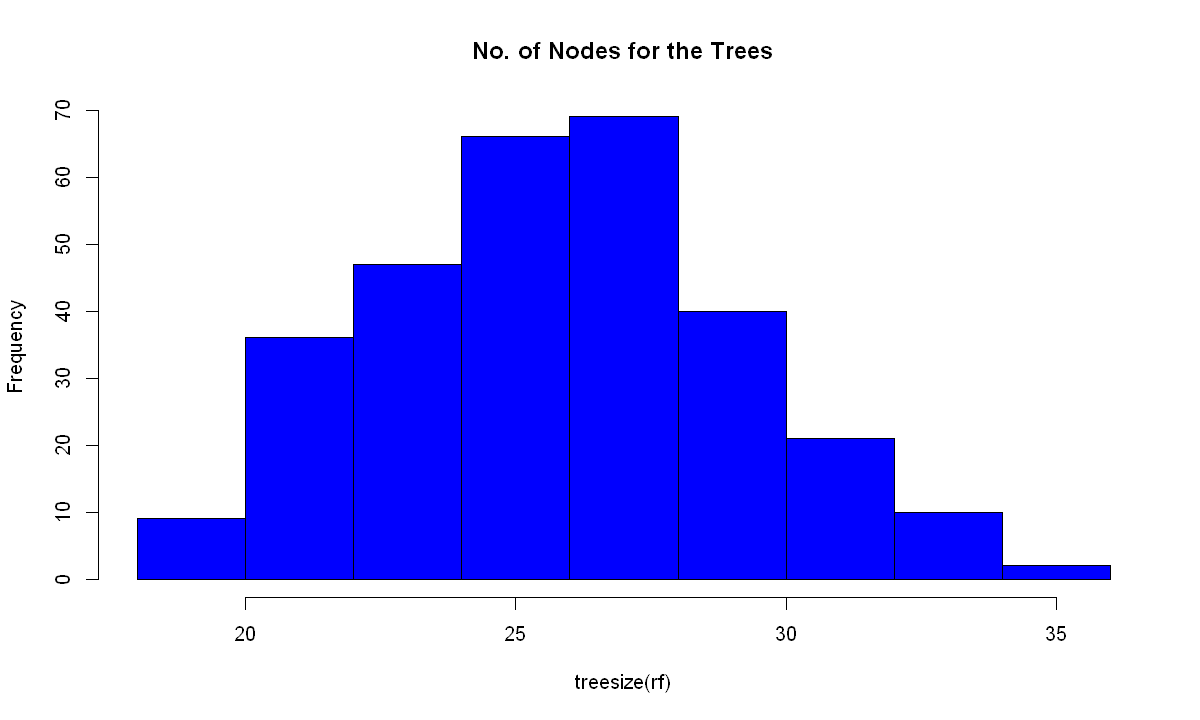

In [31]:
hist(treesize(rf),
     main = "No. of Nodes for the Trees",
     col = "blue")

,No_Disease,Disease,MeanDecreaseAccuracy,MeanDecreaseGini
age,1.0444862,0.0714290,0.8927619,6.2905957
sex,1.7071563,6.2651818,6.1389540,1.4896982
Chest_Pain,14.8016599,10.8698504,17.2746398,15.4771982
Rest_blood_pressure,-1.9283871,-1.0269198,-1.7974720,5.6858527
chol,0.8337133,0.9390275,1.2573738,8.6225247
Fast_blood_sugar,-0.2723006,-0.6964345,-0.8862541,0.5262935
Resting_result,-0.6220295,1.1648683,0.6816256,1.3617288
Max_heart_rate,1.7290912,5.7925792,5.9985118,11.3584362
Exercise_induce_Agina,3.6869999,1.0864636,3.6273437,3.4535833
oldpeak,13.7975311,13.6550541,17.5809418,14.6533756


[1]  926  176  647  866 1113   61  167 1160  164 1005  242  605  433

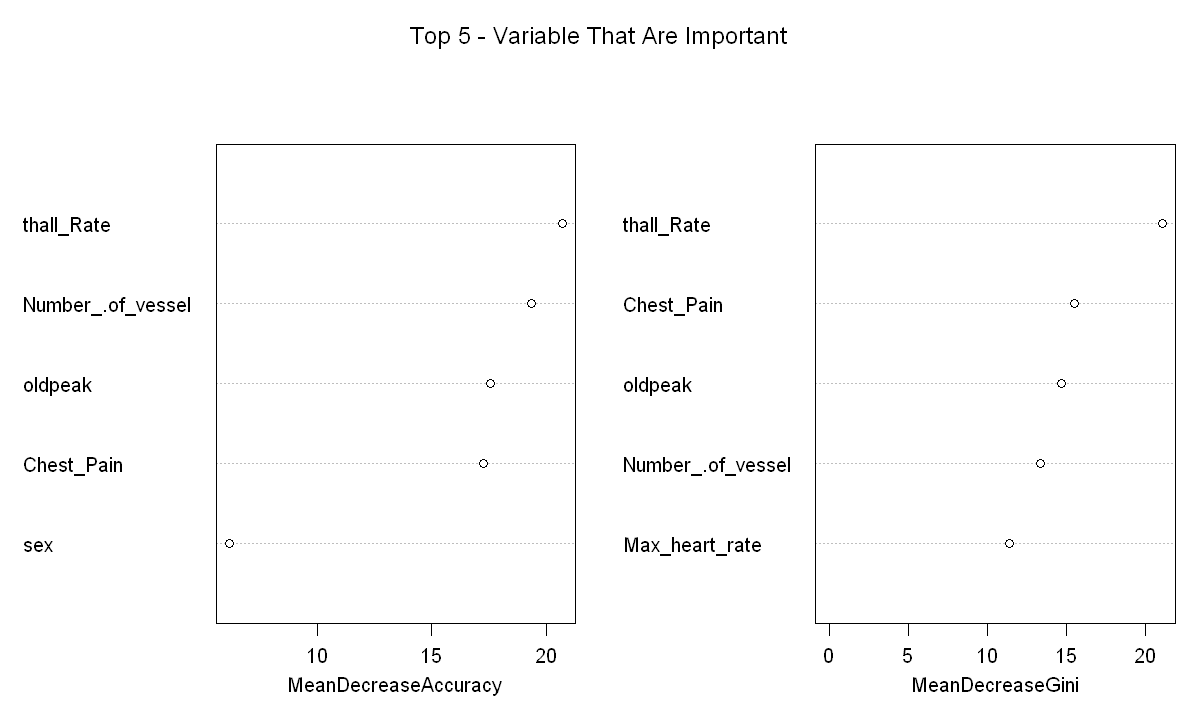

In [32]:
varImpPlot(rf,
           sort = T,
           n.var = 5,
           main = "Top 5 - Variable That Are Important")
importance(rf)
varUsed(rf)

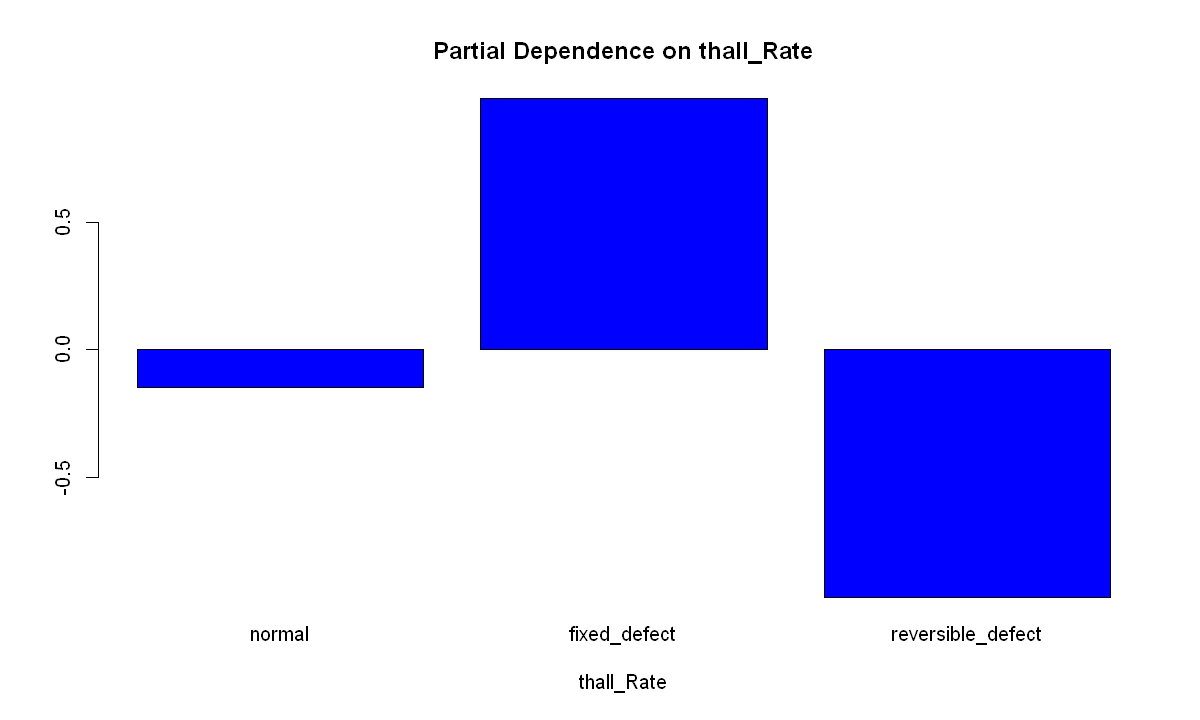

In [33]:
partialPlot(rf, trainSet, thall_Rate, "Disease")

In [34]:
getTree(rf, 1, labelVar = TRUE)

left daughter,right daughter,split var,split point,status,prediction
2,3,Number_.of_vessel,14.00,1,NA
4,5,Slope,3.00,1,NA
6,7,Max_heart_rate,129.50,1,NA
8,9,age,45.50,1,NA
10,11,sex,1.00,1,NA
12,13,Chest_Pain,4.00,1,NA
14,15,oldpeak,2.60,1,NA
0,0,NA,0.00,-1,Disease
16,17,oldpeak,0.55,1,NA
0,0,NA,0.00,-1,Disease


Warning message in RColorBrewer::brewer.pal(nlevs, "Set1"):
"minimal value for n is 3, returning requested palette with 3 different levels
"

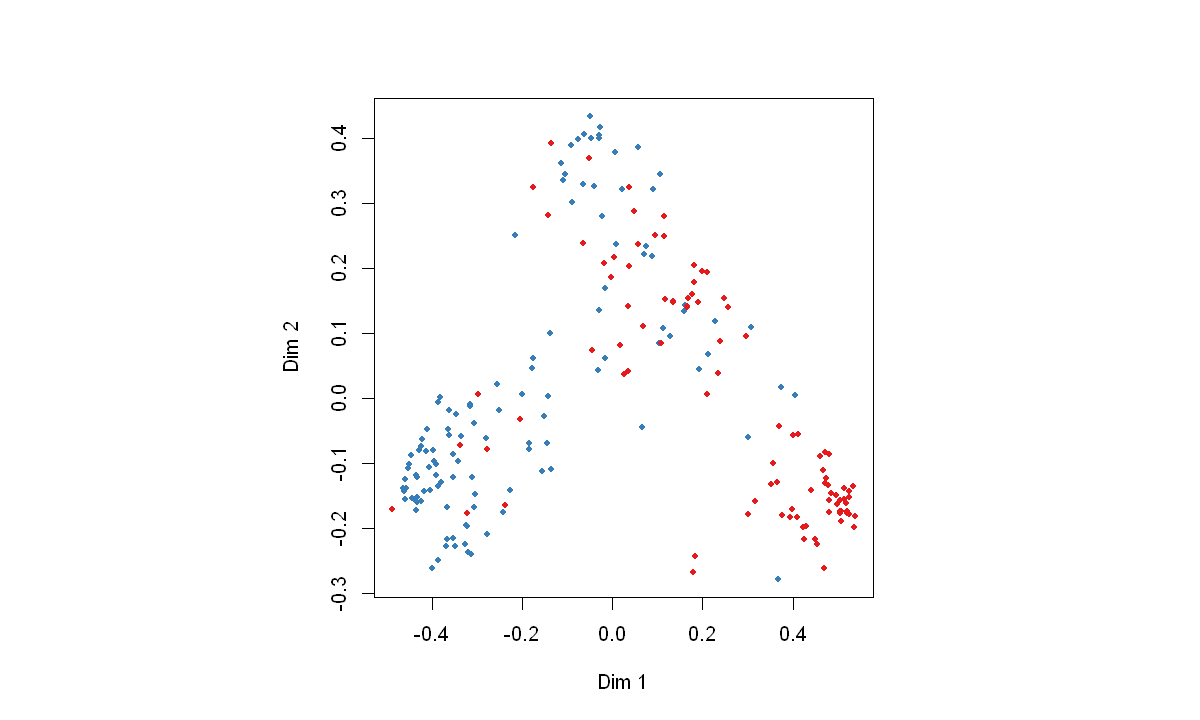

In [35]:
MDSplot(rf, trainSet$output)

### Logistic Regression

In [36]:
logistic <- glm(output ~ sex, data=heart, family="binomial")
summary(logistic)


Call:
glm(formula = output ~ sex, family = "binomial", data = heart)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6651  -1.0923   0.7585   1.2650   1.2650  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.0986     0.2357   4.661 3.15e-06 ***
sexMale      -1.3022     0.2740  -4.752 2.01e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 392.80  on 301  degrees of freedom
AIC: 396.8

Number of Fisher Scoring iterations: 4


In [37]:
female.log.odds <- log(24 / 72) #this info is coming from xTAbs above where it mentions output~sex 
female.log.odds

[1] -1.098612

In [38]:
male.log.odds.ratio <- log((114 / 93) / (24/72)) #this info is coming from xTAbs above where it mentions output~sex
male.log.odds.ratio

[1] 1.302211

In [39]:
ll.null <- logistic$null.deviance/-2
ll.proposed <- logistic$deviance/-2

In [40]:
(ll.null - ll.proposed) / ll.null

[1] 0.05947945

In [41]:
1 - pchisq(2*(ll.proposed - ll.null), df=1)
1 - pchisq((logistic$null.deviance - logistic$deviance), df=1)

[1] 6.226291e-07

[1] 6.226291e-07

In [42]:
predicted.data <- data.frame(
  probability.of.output=logistic$fitted.values,
  sex=heart$sex)

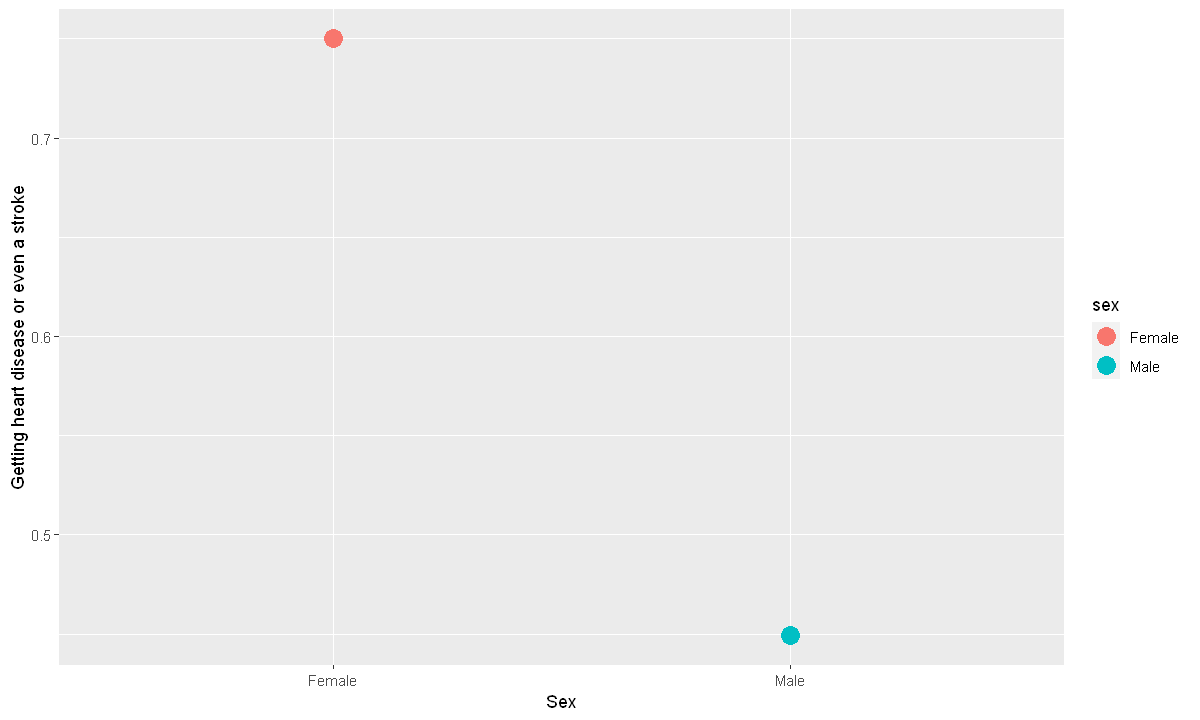

In [43]:
ggplot(data=predicted.data, aes(x=sex, y=probability.of.output)) +
  geom_point(aes(color=sex), size=5) +
  xlab("Sex") +
  ylab("Getting heart disease or even a stroke")
 
#looks like males have a better in getting this as you can see below there value is almost super close to 0

In [44]:
5xtabs(~ probability.of.output + sex, data=predicted.data) #75% change males will get it, 45 female

ERROR: Error in parse(text = x, srcfile = src): <text>:1:2: unexpected symbol
1: 5xtabs
     ^


In [ ]:
logistic <- glm(output ~ ., data=heart, family="binomial")
summary(logistic)

In [ ]:
ll.null <- logistic$null.deviance/-2
ll.proposed <- logistic$deviance/-2

In [ ]:
(ll.null - ll.proposed) / ll.null

In [ ]:
1 - pchisq(2*(ll.proposed - ll.null), df=(length(logistic$coefficients)-1))

In [ ]:
predicted.data <- data.frame(
  probability.of.output=logistic$fitted.values,
  output=heart$output)

In [ ]:
predicted.data <- predicted.data[
  order(predicted.data$probability.of.output, decreasing=FALSE),]
predicted.data$rank <- 1:nrow(predicted.data)

In [ ]:
ggplot(data=predicted.data, aes(x=rank, y=probability.of.output)) +
  geom_point(aes(color=output), alpha=1, shape=4, stroke=2) +
  xlab("Participant") +
  ylab("Getting heart disease or even a stroke")